In [1]:
import torch
import torch.nn as nn
import torch.optim as optim 
from torch.utils.data import TensorDataset, random_split
import matplotlib.pyplot as plt
from typing import Callable

In [2]:
torch.manual_seed(0)
# Prepare dataset
# Generates polynomial data 
def polynomial_data_gen(eq: Callable[[torch.Tensor], torch.Tensor], n: int = 2, x_range: list = [0, 1], noise: float = 0):
    assert noise >= 0
    x = torch.linspace(x_range[0], x_range[1], n) 
    offset = torch.rand(n) * torch.randint(-noise, noise, (n,)) if noise else torch.zeros(n)
    y = eq(x) + offset
    return x, y

In [3]:
class CustomLinearNet(nn.Module):
    def __init__(self, _in_s: int, _out_s: int, layer_conf: list):
        super().__init__()
        self._layers = nn.ModuleList(
            [getattr(torch.nn, layer_type)(**kwargs) for layer_type, kwargs in layer_conf]
        )
    
    def forward(self, x):
        for layer in self._layers:
            x = layer(x)
        return x 

Okay. Cool. Can it learn polynomials?

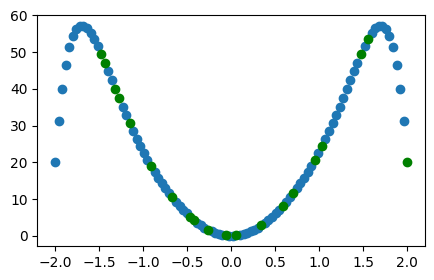

In [4]:
eq = lambda x: (-x**8) + (4 * x**6) - (5 * x**4) + 25 * x**2
X , Y = polynomial_data_gen(eq, n = 100, x_range = [-2, 2], noise= 0)
r = 0.8
train_size = int(len(X) * r) 
test_size = len(X) - train_size
train, test =  random_split(TensorDataset(X, Y), [train_size, test_size])
x_train, y_train = train[:]
x_test, y_test= test[:]

fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(x_train, y_train)
ax.scatter(x_test, y_test, color='green')

In [5]:
x_train_reshaped = x_train.reshape(-1, 1)
y_train_reshaped = y_train.reshape(-1, 1)

model = CustomLinearNet(1,1, 
                        [ ('Linear', {'in_features': 1, 'out_features': 1}), 
                            ('tanh', {}),
                        ]
                       )
print(f"Model: \n{model}")
EPOCH = 50 
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print("Training loop:")
# Training loop
for epoch in range(EPOCH):
    # Forward pass
    ypred = model.forward(x_train_reshaped)
    
    # Zero grad
    optimizer.zero_grad()
    
    # Backward pass
    loss = criterion(ypred, y_train_reshaped)
    loss.backward()
    
    # Update
    optimizer.step()
    
    print(f"epoch {epoch}, Loss: {loss.item()}")

Model: 
CustomLinearNet(
  (_layers): ModuleList(
    (0): Linear(in_features=1, out_features=1, bias=True)
    (1): Sigmoid()
  )
)
Training loop:
epoch 0, Loss: 1060.423095703125
epoch 1, Loss: 1059.253662109375
epoch 2, Loss: 1058.124755859375
epoch 3, Loss: 1057.0631103515625
epoch 4, Loss: 1056.0860595703125
epoch 5, Loss: 1055.2020263671875
epoch 6, Loss: 1054.411376953125
epoch 7, Loss: 1053.7080078125
epoch 8, Loss: 1053.0843505859375
epoch 9, Loss: 1052.530517578125
epoch 10, Loss: 1052.037353515625
epoch 11, Loss: 1051.596923828125
epoch 12, Loss: 1051.2015380859375
epoch 13, Loss: 1050.8453369140625
epoch 14, Loss: 1050.522705078125
epoch 15, Loss: 1050.2293701171875
epoch 16, Loss: 1049.961669921875
epoch 17, Loss: 1049.7164306640625
epoch 18, Loss: 1049.490966796875
epoch 19, Loss: 1049.2828369140625
epoch 20, Loss: 1049.0904541015625
epoch 21, Loss: 1048.911865234375
epoch 22, Loss: 1048.7459716796875
epoch 23, Loss: 1048.5911865234375
epoch 24, Loss: 1048.4466552734375
e

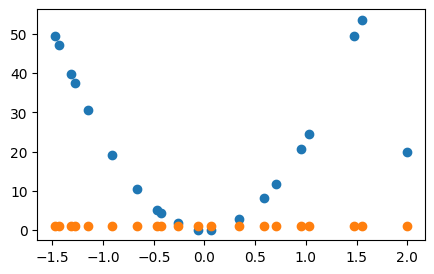

In [6]:
x_test_reshaped = x_test.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)
ypred = model.forward(x_test_reshaped)

fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(x_test, y_test)

ax.scatter(x_test_reshaped.detach().numpy(), ypred.detach().numpy())

Okay. Can two neurons learn polynomials?

In [7]:
model = CustomLinearNet(1,1, 
                        [ ('Linear', {'in_features': 1, 'out_features': 2}), 
                            ('ReLU', {}),
                            ('Linear', {'in_features': 2, 'out_features': 1}), 
                        ]
                       )
print(f"Model: \n{model}")
EPOCH = 50 
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

print("Training loop:")
# Training loop
for epoch in range(EPOCH):
    # Forward pass
    ypred = model.forward(x_train_reshaped)
    
    # Zero grad
    optimizer.zero_grad()
    
    # Backward pass
    loss = criterion(ypred, y_train_reshaped)
    loss.backward()
    
    # Update
    optimizer.step()
    
    print(f"epoch {epoch}, Loss: {loss.item()}")

Model: 
CustomLinearNet(
  (_layers): ModuleList(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2, out_features=1, bias=True)
  )
)
Training loop:
epoch 0, Loss: 1125.201416015625
epoch 1, Loss: 1118.4647216796875
epoch 2, Loss: 1111.113037109375
epoch 3, Loss: 1102.676025390625
epoch 4, Loss: 1093.09228515625
epoch 5, Loss: 1082.3399658203125
epoch 6, Loss: 1070.4088134765625
epoch 7, Loss: 1057.2913818359375
epoch 8, Loss: 1042.9854736328125
epoch 9, Loss: 1027.49560546875
epoch 10, Loss: 1010.8372192382812
epoch 11, Loss: 993.03271484375
epoch 12, Loss: 974.1189575195312
epoch 13, Loss: 954.1512451171875
epoch 14, Loss: 933.1989135742188
epoch 15, Loss: 911.3435668945312
epoch 16, Loss: 888.6798706054688
epoch 17, Loss: 865.3274536132812
epoch 18, Loss: 841.4302978515625
epoch 19, Loss: 817.1389770507812
epoch 20, Loss: 792.6458129882812
epoch 21, Loss: 768.1417846679688
epoch 22, Loss: 743.8560180664062
epoch 23, Loss: 720.034

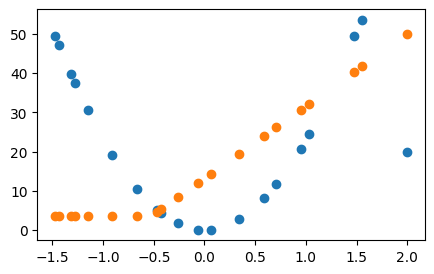

In [8]:
x_test_reshaped = x_test.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)
ypred = model.forward(x_test_reshaped)

fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(x_test, y_test)

ax.scatter(x_test_reshaped.detach().numpy(), ypred.detach().numpy())

Okay. Can two layers learn polynomials? 

https://theory.stanford.edu/~valiant/papers/andoni14.pdf